## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.819041  0.275709 -0.549464  1.015602 -0.816695 -0.908781
1  0.762977 -0.067346 -0.226005 -1.462150 -0.294303 -0.601839
2  0.348260  0.942388  0.983959  1.903997  1.540826  2.657288
3 -0.184311  1.695492 -1.466935  1.229406 -1.303120  1.675769
4 -0.478562  0.796185  1.194637  1.554910  0.823876  1.904478


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9607551	total: 60.2ms	remaining: 1m
1:	learn: 0.9527942	total: 60.9ms	remaining: 30.4s
2:	learn: 0.9450970	total: 61.4ms	remaining: 20.4s
3:	learn: 0.9357130	total: 62.1ms	remaining: 15.5s
4:	learn: 0.9268217	total: 62.6ms	remaining: 12.5s
5:	learn: 0.9162548	total: 63.1ms	remaining: 10.5s
6:	learn: 0.9079221	total: 63.7ms	remaining: 9.04s
7:	learn: 0.8994270	total: 64.2ms	remaining: 7.96s
8:	learn: 0.8908397	total: 64.8ms	remaining: 7.13s
9:	learn: 0.8825044	total: 65.3ms	remaining: 6.47s
10:	learn: 0.8728355	total: 65.7ms	remaining: 5.91s
11:	learn: 0.8658438	total: 66.2ms	remaining: 5.45s
12:	learn: 0.8560598	total: 66.7ms	remaining: 5.07s
13:	learn: 0.8479186	total: 67.2ms	remaining: 4.73s
14:	learn: 0.8409043	total: 67.6ms	remaining: 4.44s
15:	learn: 0.8341584	total: 68.1ms	remaining: 4.18s
16:	learn: 0.8282323	total: 68.6ms	remaining: 3.97s
17:	learn: 0.8215007	total: 69ms	remaining: 3.77s
18:	learn: 0.8145415	total: 69.5ms	remaining: 3.5

92:	learn: 0.4406754	total: 107ms	remaining: 1.04s
93:	learn: 0.4367727	total: 107ms	remaining: 1.03s
94:	learn: 0.4328869	total: 108ms	remaining: 1.03s
95:	learn: 0.4290815	total: 108ms	remaining: 1.02s
96:	learn: 0.4252206	total: 109ms	remaining: 1.01s
97:	learn: 0.4217496	total: 109ms	remaining: 1s
98:	learn: 0.4186487	total: 109ms	remaining: 995ms
99:	learn: 0.4156171	total: 110ms	remaining: 987ms
100:	learn: 0.4127448	total: 110ms	remaining: 980ms
101:	learn: 0.4097179	total: 111ms	remaining: 974ms
102:	learn: 0.4062804	total: 111ms	remaining: 968ms
103:	learn: 0.4031320	total: 112ms	remaining: 961ms
104:	learn: 0.3998067	total: 112ms	remaining: 955ms
105:	learn: 0.3968907	total: 113ms	remaining: 950ms
106:	learn: 0.3936653	total: 113ms	remaining: 945ms
107:	learn: 0.3910692	total: 114ms	remaining: 941ms
108:	learn: 0.3880371	total: 114ms	remaining: 935ms
109:	learn: 0.3848299	total: 115ms	remaining: 929ms
110:	learn: 0.3823695	total: 115ms	remaining: 923ms
111:	learn: 0.3797179	t

257:	learn: 0.1421942	total: 188ms	remaining: 541ms
258:	learn: 0.1412796	total: 189ms	remaining: 540ms
259:	learn: 0.1403095	total: 189ms	remaining: 539ms
260:	learn: 0.1392424	total: 190ms	remaining: 537ms
261:	learn: 0.1381282	total: 190ms	remaining: 536ms
262:	learn: 0.1374168	total: 191ms	remaining: 534ms
263:	learn: 0.1363863	total: 191ms	remaining: 533ms
264:	learn: 0.1356859	total: 192ms	remaining: 532ms
265:	learn: 0.1347437	total: 192ms	remaining: 531ms
266:	learn: 0.1337868	total: 193ms	remaining: 529ms
267:	learn: 0.1332203	total: 193ms	remaining: 528ms
268:	learn: 0.1322749	total: 194ms	remaining: 527ms
269:	learn: 0.1315348	total: 197ms	remaining: 533ms
270:	learn: 0.1307617	total: 197ms	remaining: 531ms
271:	learn: 0.1302155	total: 198ms	remaining: 530ms
272:	learn: 0.1294855	total: 199ms	remaining: 529ms
273:	learn: 0.1284723	total: 199ms	remaining: 527ms
274:	learn: 0.1278733	total: 200ms	remaining: 526ms
275:	learn: 0.1270413	total: 200ms	remaining: 525ms
276:	learn: 

440:	learn: 0.0499722	total: 292ms	remaining: 370ms
441:	learn: 0.0497161	total: 293ms	remaining: 369ms
442:	learn: 0.0494781	total: 293ms	remaining: 369ms
443:	learn: 0.0493096	total: 294ms	remaining: 368ms
444:	learn: 0.0490231	total: 294ms	remaining: 367ms
445:	learn: 0.0488592	total: 294ms	remaining: 366ms
446:	learn: 0.0485816	total: 295ms	remaining: 365ms
447:	learn: 0.0483062	total: 295ms	remaining: 364ms
448:	learn: 0.0479900	total: 296ms	remaining: 363ms
449:	learn: 0.0478993	total: 296ms	remaining: 362ms
450:	learn: 0.0476741	total: 297ms	remaining: 362ms
451:	learn: 0.0474032	total: 297ms	remaining: 361ms
452:	learn: 0.0471745	total: 298ms	remaining: 360ms
453:	learn: 0.0468333	total: 298ms	remaining: 359ms
454:	learn: 0.0466807	total: 299ms	remaining: 358ms
455:	learn: 0.0465953	total: 299ms	remaining: 357ms
456:	learn: 0.0463367	total: 300ms	remaining: 356ms
457:	learn: 0.0459874	total: 300ms	remaining: 355ms
458:	learn: 0.0458403	total: 301ms	remaining: 354ms
459:	learn: 

590:	learn: 0.0244347	total: 373ms	remaining: 258ms
591:	learn: 0.0243360	total: 374ms	remaining: 258ms
592:	learn: 0.0242934	total: 375ms	remaining: 257ms
593:	learn: 0.0241733	total: 375ms	remaining: 256ms
594:	learn: 0.0240285	total: 375ms	remaining: 256ms
595:	learn: 0.0239336	total: 376ms	remaining: 255ms
596:	learn: 0.0238926	total: 376ms	remaining: 254ms
597:	learn: 0.0237778	total: 377ms	remaining: 253ms
598:	learn: 0.0236851	total: 378ms	remaining: 253ms
599:	learn: 0.0235455	total: 378ms	remaining: 252ms
600:	learn: 0.0235060	total: 379ms	remaining: 251ms
601:	learn: 0.0234158	total: 379ms	remaining: 251ms
602:	learn: 0.0233770	total: 379ms	remaining: 250ms
603:	learn: 0.0232837	total: 380ms	remaining: 249ms
604:	learn: 0.0231362	total: 380ms	remaining: 248ms
605:	learn: 0.0230480	total: 381ms	remaining: 248ms
606:	learn: 0.0229615	total: 381ms	remaining: 247ms
607:	learn: 0.0228095	total: 382ms	remaining: 246ms
608:	learn: 0.0227197	total: 382ms	remaining: 245ms
609:	learn: 

794:	learn: 0.0108930	total: 477ms	remaining: 123ms
795:	learn: 0.0108600	total: 477ms	remaining: 122ms
796:	learn: 0.0108321	total: 478ms	remaining: 122ms
797:	learn: 0.0107874	total: 478ms	remaining: 121ms
798:	learn: 0.0107487	total: 479ms	remaining: 120ms
799:	learn: 0.0107168	total: 479ms	remaining: 120ms
800:	learn: 0.0106786	total: 480ms	remaining: 119ms
801:	learn: 0.0106384	total: 480ms	remaining: 119ms
802:	learn: 0.0106229	total: 481ms	remaining: 118ms
803:	learn: 0.0105918	total: 481ms	remaining: 117ms
804:	learn: 0.0105542	total: 481ms	remaining: 117ms
805:	learn: 0.0105115	total: 482ms	remaining: 116ms
806:	learn: 0.0104800	total: 482ms	remaining: 115ms
807:	learn: 0.0104580	total: 483ms	remaining: 115ms
808:	learn: 0.0104279	total: 483ms	remaining: 114ms
809:	learn: 0.0104138	total: 484ms	remaining: 114ms
810:	learn: 0.0103830	total: 485ms	remaining: 113ms
811:	learn: 0.0103691	total: 485ms	remaining: 112ms
812:	learn: 0.0103355	total: 486ms	remaining: 112ms
813:	learn: 

940:	learn: 0.0073445	total: 558ms	remaining: 35ms
941:	learn: 0.0073165	total: 558ms	remaining: 34.4ms
942:	learn: 0.0073071	total: 559ms	remaining: 33.8ms
943:	learn: 0.0072987	total: 559ms	remaining: 33.2ms
944:	learn: 0.0072756	total: 560ms	remaining: 32.6ms
945:	learn: 0.0072339	total: 561ms	remaining: 32ms
946:	learn: 0.0072217	total: 561ms	remaining: 31.4ms
947:	learn: 0.0071889	total: 562ms	remaining: 30.8ms
948:	learn: 0.0071594	total: 562ms	remaining: 30.2ms
949:	learn: 0.0071512	total: 563ms	remaining: 29.6ms
950:	learn: 0.0071290	total: 563ms	remaining: 29ms
951:	learn: 0.0070970	total: 564ms	remaining: 28.4ms
952:	learn: 0.0070655	total: 564ms	remaining: 27.8ms
953:	learn: 0.0070536	total: 565ms	remaining: 27.2ms
954:	learn: 0.0070225	total: 566ms	remaining: 26.7ms
955:	learn: 0.0069962	total: 566ms	remaining: 26.1ms
956:	learn: 0.0069882	total: 567ms	remaining: 25.5ms
957:	learn: 0.0069766	total: 567ms	remaining: 24.9ms
958:	learn: 0.0069489	total: 568ms	remaining: 24.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

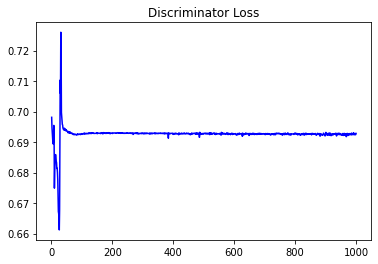

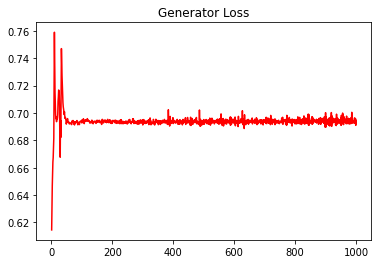

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12548271649039286


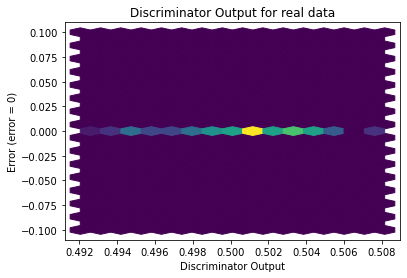

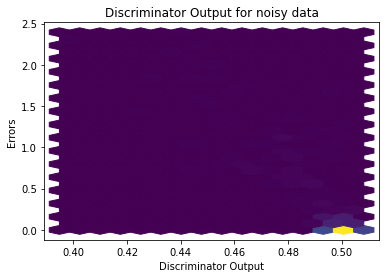

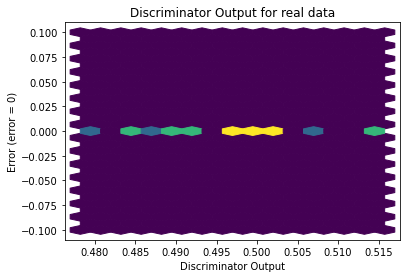

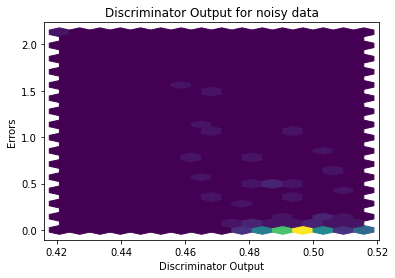

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


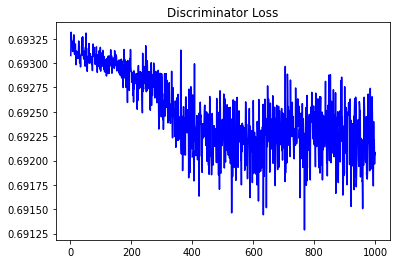

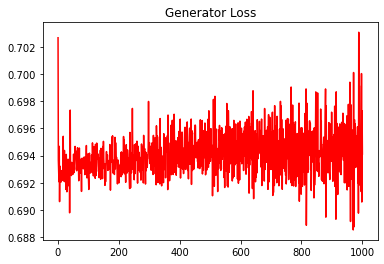

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1241595807990377


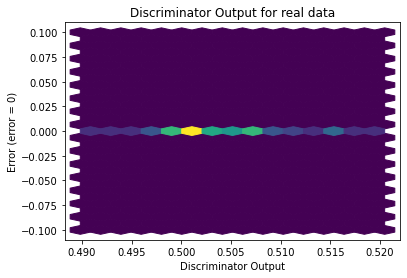

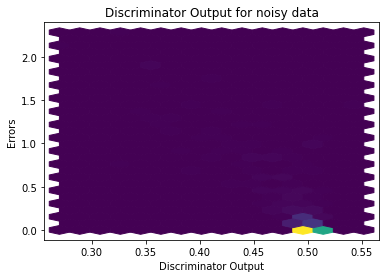

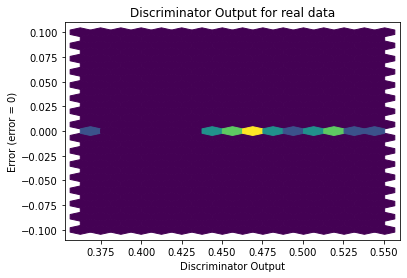

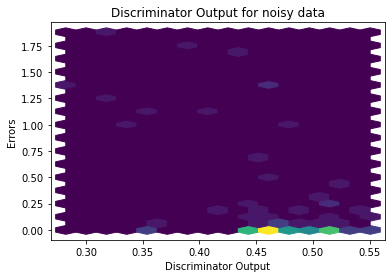

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0931]], requires_grad=True)
